In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
 

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

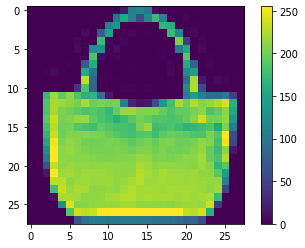

In [7]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

In [8]:
x_train = x_train/ 255
x_test = x_test/ 255

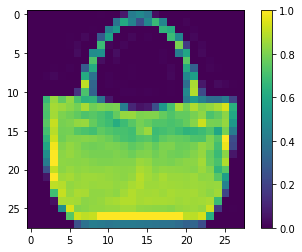

In [9]:
plt.figure()
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(False)

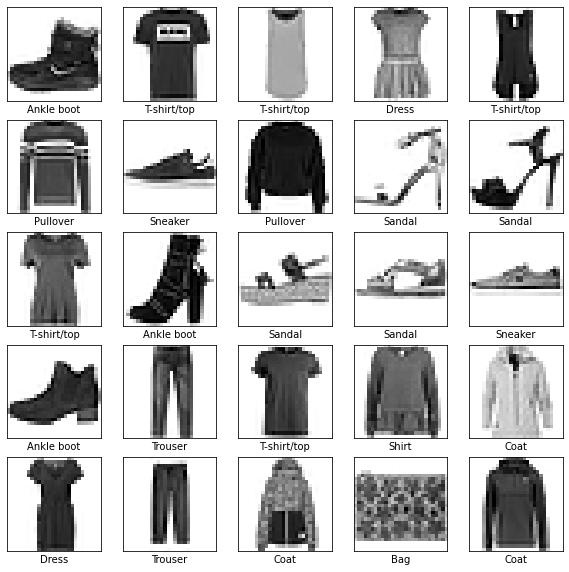

In [11]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])


In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7529 - accuracy: 0.7554
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.8234
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4700 - accuracy: 0.8377
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4447 - accuracy: 0.8458
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4277 - accuracy: 0.8527
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4125 - accuracy: 0.8565
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4003 - accuracy: 0.8611
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3897 - accuracy: 0.8652
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8673
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.373

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8521
Test loss: 0.4230538606643677
Test accuracy: 0.8521000146865845


In [18]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 4s 2ms/step


In [19]:
predictions[0]

array([4.6008356e-08, 1.6698334e-09, 2.8745517e-09, 2.6145350e-09,
       6.0496541e-09, 3.7841406e-04, 7.1345497e-08, 1.1492393e-03,
       2.6683638e-05, 9.9844551e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
y_train[0]

9

Text(0.5, 0, 'Ankle boot')

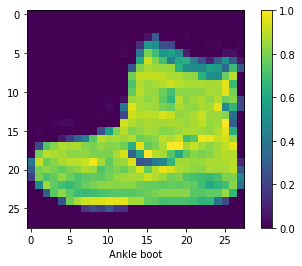

In [23]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])